<a href="https://colab.research.google.com/github/Aktron16/Machine_Learning_CarsML/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [354]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Cars_data.csv')

# Data Cleaning

In [355]:
df.drop(columns=['Ad ID','Car Name','Registration city','Car documents','Assembly','Condition','Seller Location','Description','Car Features',"Images URL's",'Car Profile'],inplace=True)

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          9179 non-null   object
 1   Model         9179 non-null   object
 2   Year          9179 non-null   int64 
 3   KM's driven   9179 non-null   int64 
 4   Price         9179 non-null   int64 
 5   Fuel          9179 non-null   object
 6   Transmission  9179 non-null   object
dtypes: int64(3), object(4)
memory usage: 502.1+ KB


In [357]:
df.columns = df.columns.str.replace("'",'').str.replace(' ','_')
df.rename(columns={'KMs_driven':'Km_driven'},inplace=True)

In [358]:
df['Price'] = pd.to_numeric(df['Price'],errors='coerce').astype(int)
df['Km_driven'] = pd.to_numeric(df['Km_driven'],errors='coerce').astype(int)
df['Year'] = pd.to_numeric(df['Year'],errors='coerce').astype(int)

df['Fuel'] = df['Fuel'].fillna('Unknown')
df['Transmission'] = df['Transmission'].fillna('Unknown')

df['Make'] = df['Make'].str.title()
df['Model'] = df['Model'].str.title()

In [359]:
df.dtypes

,0
Make,object
Model,object
Year,int64
Km_driven,int64
Price,int64
Fuel,object
Transmission,object


In [360]:
df['Fuel'].unique()

array(['Petrol', 'CNG', 'Hybrid', 'Diesel'], dtype=object)

In [361]:
df['Transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [362]:
df.isnull().any()

,0
Make,False
Model,False
Year,False
Km_driven,False
Price,False
Fuel,False
Transmission,False


In [363]:
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Km_driven,0
Price,0
Fuel,0
Transmission,0


In [364]:
df.dropna(axis=0,inplace=True)
df.isnull().sum().sum()

np.int64(0)

In [365]:
df.duplicated().sum()

np.int64(384)

In [366]:
df[df.duplicated()]

,Make,Model,Year,Km_driven,Price,Fuel,Transmission
606,Honda,City Ivtec,2019,60000,3875000,Petrol,Automatic
817,Suzuki,Ravi,2022,2700,1850000,Petrol,Manual
883,Daihatsu,Terios Kid,2001,120000,1570000,Petrol,Automatic
1103,Daihatsu,Cuore,2000,15000,650000,Petrol,Manual
1254,Hyundai,Santro,2006,123521,798000,Petrol,Manual
...,...,...,...,...,...,...,...
9129,Suzuki,Mehran Vxr,2007,120000,690000,Petrol,Manual
9137,Toyota,Corolla Gli,2013,354720,2450000,Petrol,Manual
9148,Suzuki,Cultus Vxr,2010,1234,985000,Petrol,Manual
9159,Suzuki,Swift,2018,151000,2425000,Petrol,Manual


In [367]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

np.int64(0)

In [368]:
df.head()

,Make,Model,Year,Km_driven,Price,Fuel,Transmission
0,Toyota,Passo,2021,54000,4190000,Petrol,Automatic
1,Suzuki,Ravi,2018,95000,1300000,Petrol,Manual
2,Suzuki,Bolan,2015,50000,800000,Petrol,Manual
3,Daihatsu,Move,2013,94000,2155000,Petrol,Automatic
4,Suzuki,Swift,2011,126544,1440000,Petrol,Manual


In [369]:
df.tail()

,Make,Model,Year,Km_driven,Price,Fuel,Transmission
8790,Suzuki,Wagon R,2014,115000,2725000,Petrol,Automatic
8791,Suzuki,Wagon R,2017,100000,1850000,Petrol,Manual
8792,Kia,Spectra,2001,123456,1100000,Petrol,Automatic
8793,Suzuki,Alto,2009,89000,970000,Petrol,Manual
8794,Daihatsu,Move,2016,95000,2050000,Petrol,Automatic


In [370]:
df.describe()

,Year,Km_driven,Price
count,8795.000000,8795.000000,8.795000e+03
mean,2012.247527,96910.354179,2.036285e+06
std,6.041138,62193.661768,1.157100e+06
min,1989.000000,1.000000,1.850000e+05
25%,2007.000000,53750.000000,1.030000e+06
50%,2013.000000,92000.000000,1.815000e+06
75%,2017.000000,126382.500000,2.750000e+06
max,2024.000000,533528.000000,5.000000e+06


In [371]:
df.shape

(8795, 7)

# Encoding The Data

In [372]:
df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col].astype(str)).astype(int)

In [373]:
df_encoded.head()

,Make,Model,Year,Km_driven,Price,Fuel,Transmission,Make_encoded,Model_encoded,Fuel_encoded,Transmission_encoded
0,Toyota,Passo,2021,54000,4190000,Petrol,Automatic,10,44,3,0
1,Suzuki,Ravi,2018,95000,1300000,Petrol,Manual,9,47,3,1
2,Suzuki,Bolan,2015,50000,800000,Petrol,Manual,9,4,3,1
3,Daihatsu,Move,2013,94000,2155000,Petrol,Automatic,2,42,3,0
4,Suzuki,Swift,2011,126544,1440000,Petrol,Manual,9,52,3,1


In [374]:
df_encoded.tail()

,Make,Model,Year,Km_driven,Price,Fuel,Transmission,Make_encoded,Model_encoded,Fuel_encoded,Transmission_encoded
8790,Suzuki,Wagon R,2014,115000,2725000,Petrol,Automatic,9,55,3,0
8791,Suzuki,Wagon R,2017,100000,1850000,Petrol,Manual,9,55,3,1
8792,Kia,Spectra,2001,123456,1100000,Petrol,Automatic,6,49,3,0
8793,Suzuki,Alto,2009,89000,970000,Petrol,Manual,9,2,3,1
8794,Daihatsu,Move,2016,95000,2050000,Petrol,Automatic,2,42,3,0


In [375]:
df_encoded.describe()

,Year,Km_driven,Price,Make_encoded,Model_encoded,Fuel_encoded,Transmission_encoded
count,8795.000000,8795.000000,8.795000e+03,8795.000000,8795.000000,8795.000000,8795.000000
mean,2012.247527,96910.354179,2.036285e+06,6.484821,25.591359,2.936896,0.611143
std,6.041138,62193.661768,1.157100e+06,3.158117,17.678771,0.429996,0.487519
min,1989.000000,1.000000,1.850000e+05,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,53750.000000,1.030000e+06,4.000000,9.000000,3.000000,0.000000
50%,2013.000000,92000.000000,1.815000e+06,9.000000,23.000000,3.000000,1.000000
75%,2017.000000,126382.500000,2.750000e+06,9.000000,41.000000,3.000000,1.000000
max,2024.000000,533528.000000,5.000000e+06,10.000000,57.000000,3.000000,1.000000


In [376]:
df_encoded.shape

(8795, 11)

# Exploratory Data Analysis (EDA)

/tmp/ipython-input-736286585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_encoded['Km_driven'], kde = True)


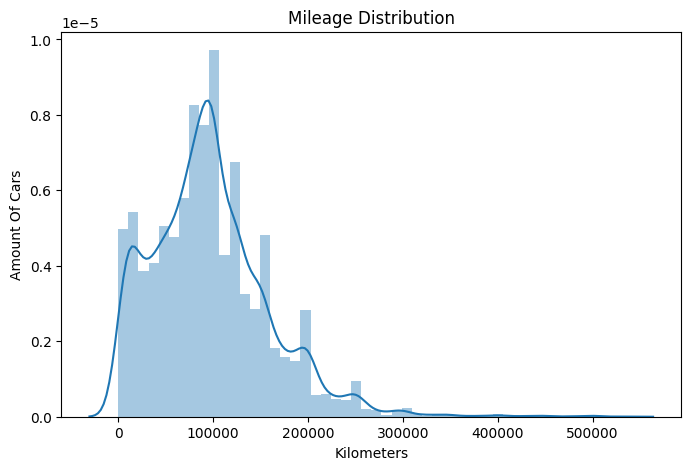

In [386]:
plt.figure(figsize=(8,5))
sns.distplot(df_encoded['Km_driven'], kde = True)
plt.title('Mileage Distribution')
plt.xlabel('Kilometers')
plt.ylabel('Amount Of Cars')
plt.show()

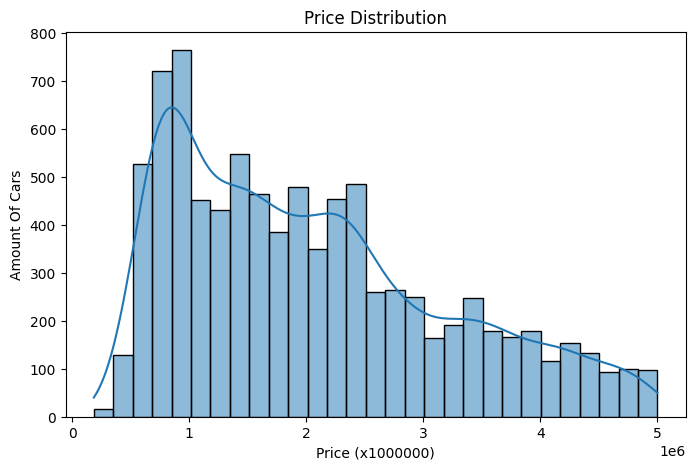


These are some Price Statistics
Skewness: 0.68
Kurtosis: -0.46
Mean: 2036285.40
Median: 1815000.00
Standard Deviation: 1157100.49


In [399]:
plt.figure(figsize=(8,5))
sns.histplot(df_encoded['Price'], kde = True)
plt.title('Price Distribution')
plt.xlabel('Price (x1000000)')
plt.ylabel('Amount Of Cars')
plt.show()

print('\nThese are some Price Statistics')
print(f'Skewness: {df_encoded["Price"].skew():.2f}')
print(f'Kurtosis: {df_encoded["Price"].kurt():.2f}')
print(f'Mean: {df_encoded["Price"].mean():.2f}')
print(f'Median: {df_encoded["Price"].median():.2f}')
print(f'Standard Deviation: {df_encoded["Price"].std():.2f}')

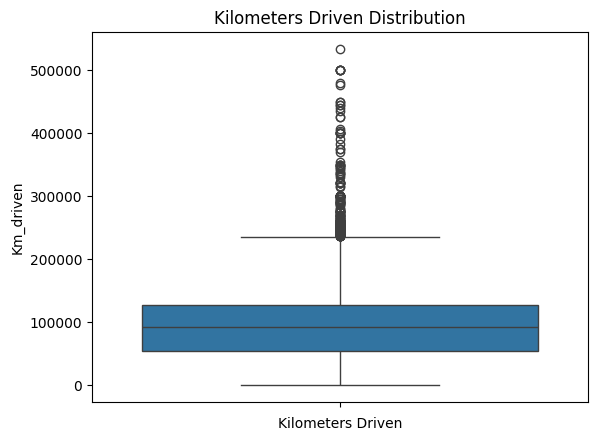

In [380]:
sns.boxplot(y = df_encoded['Km_driven'])
plt.title('Kilometers Driven Distribution')
plt.xlabel('Kilometers Driven')
plt.show()

/tmp/ipython-input-2769810162.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_trans.index, y=avg_price_trans.values, palette="coolwarm")


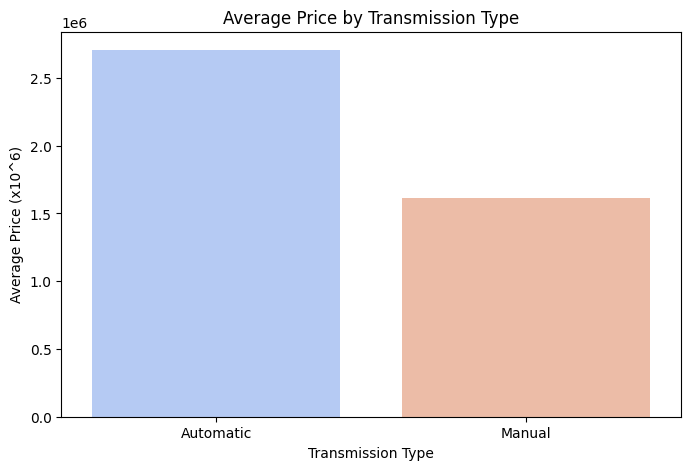

In [384]:
avg_price_trans = df_encoded.groupby("Transmission")["Price"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_price_trans.index, y=avg_price_trans.values, palette="coolwarm")
plt.title("Average Price by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Average Price (x10^6)")
plt.show()

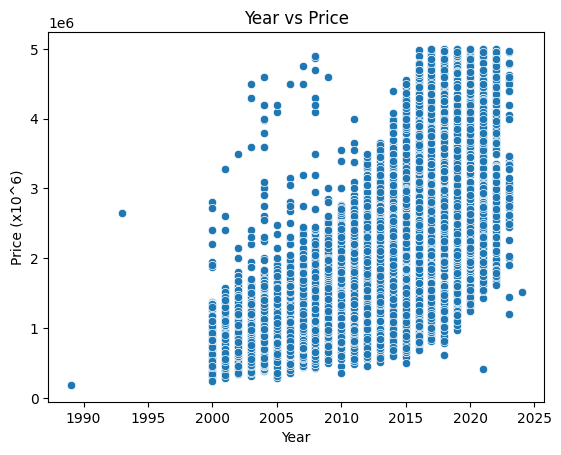

In [388]:
sns.scatterplot(x = 'Year', y = 'Price', data = df_encoded)
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price (x10^6)')
plt.show()

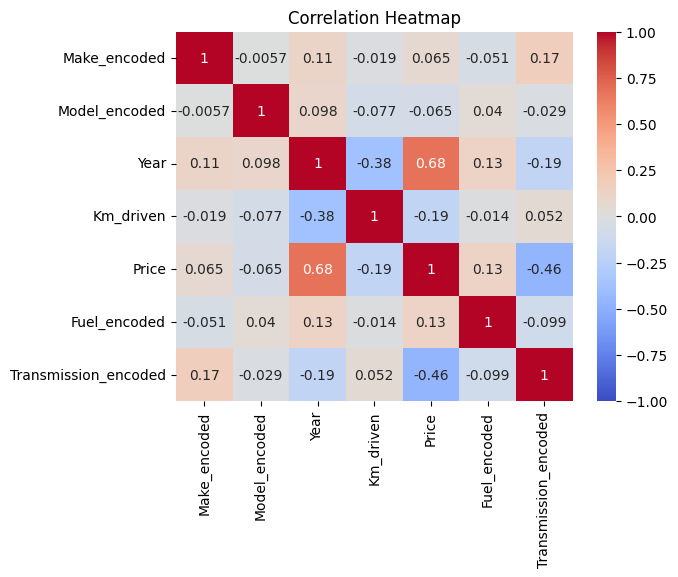

In [396]:
int_cols = ['Make_encoded','Model_encoded','Year','Km_driven','Price','Fuel_encoded','Transmission_encoded']
correlate_int_cols = df_encoded[int_cols].corr()
sns.heatmap(correlate_int_cols, annot=True,vmin = -1,vmax = 1, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

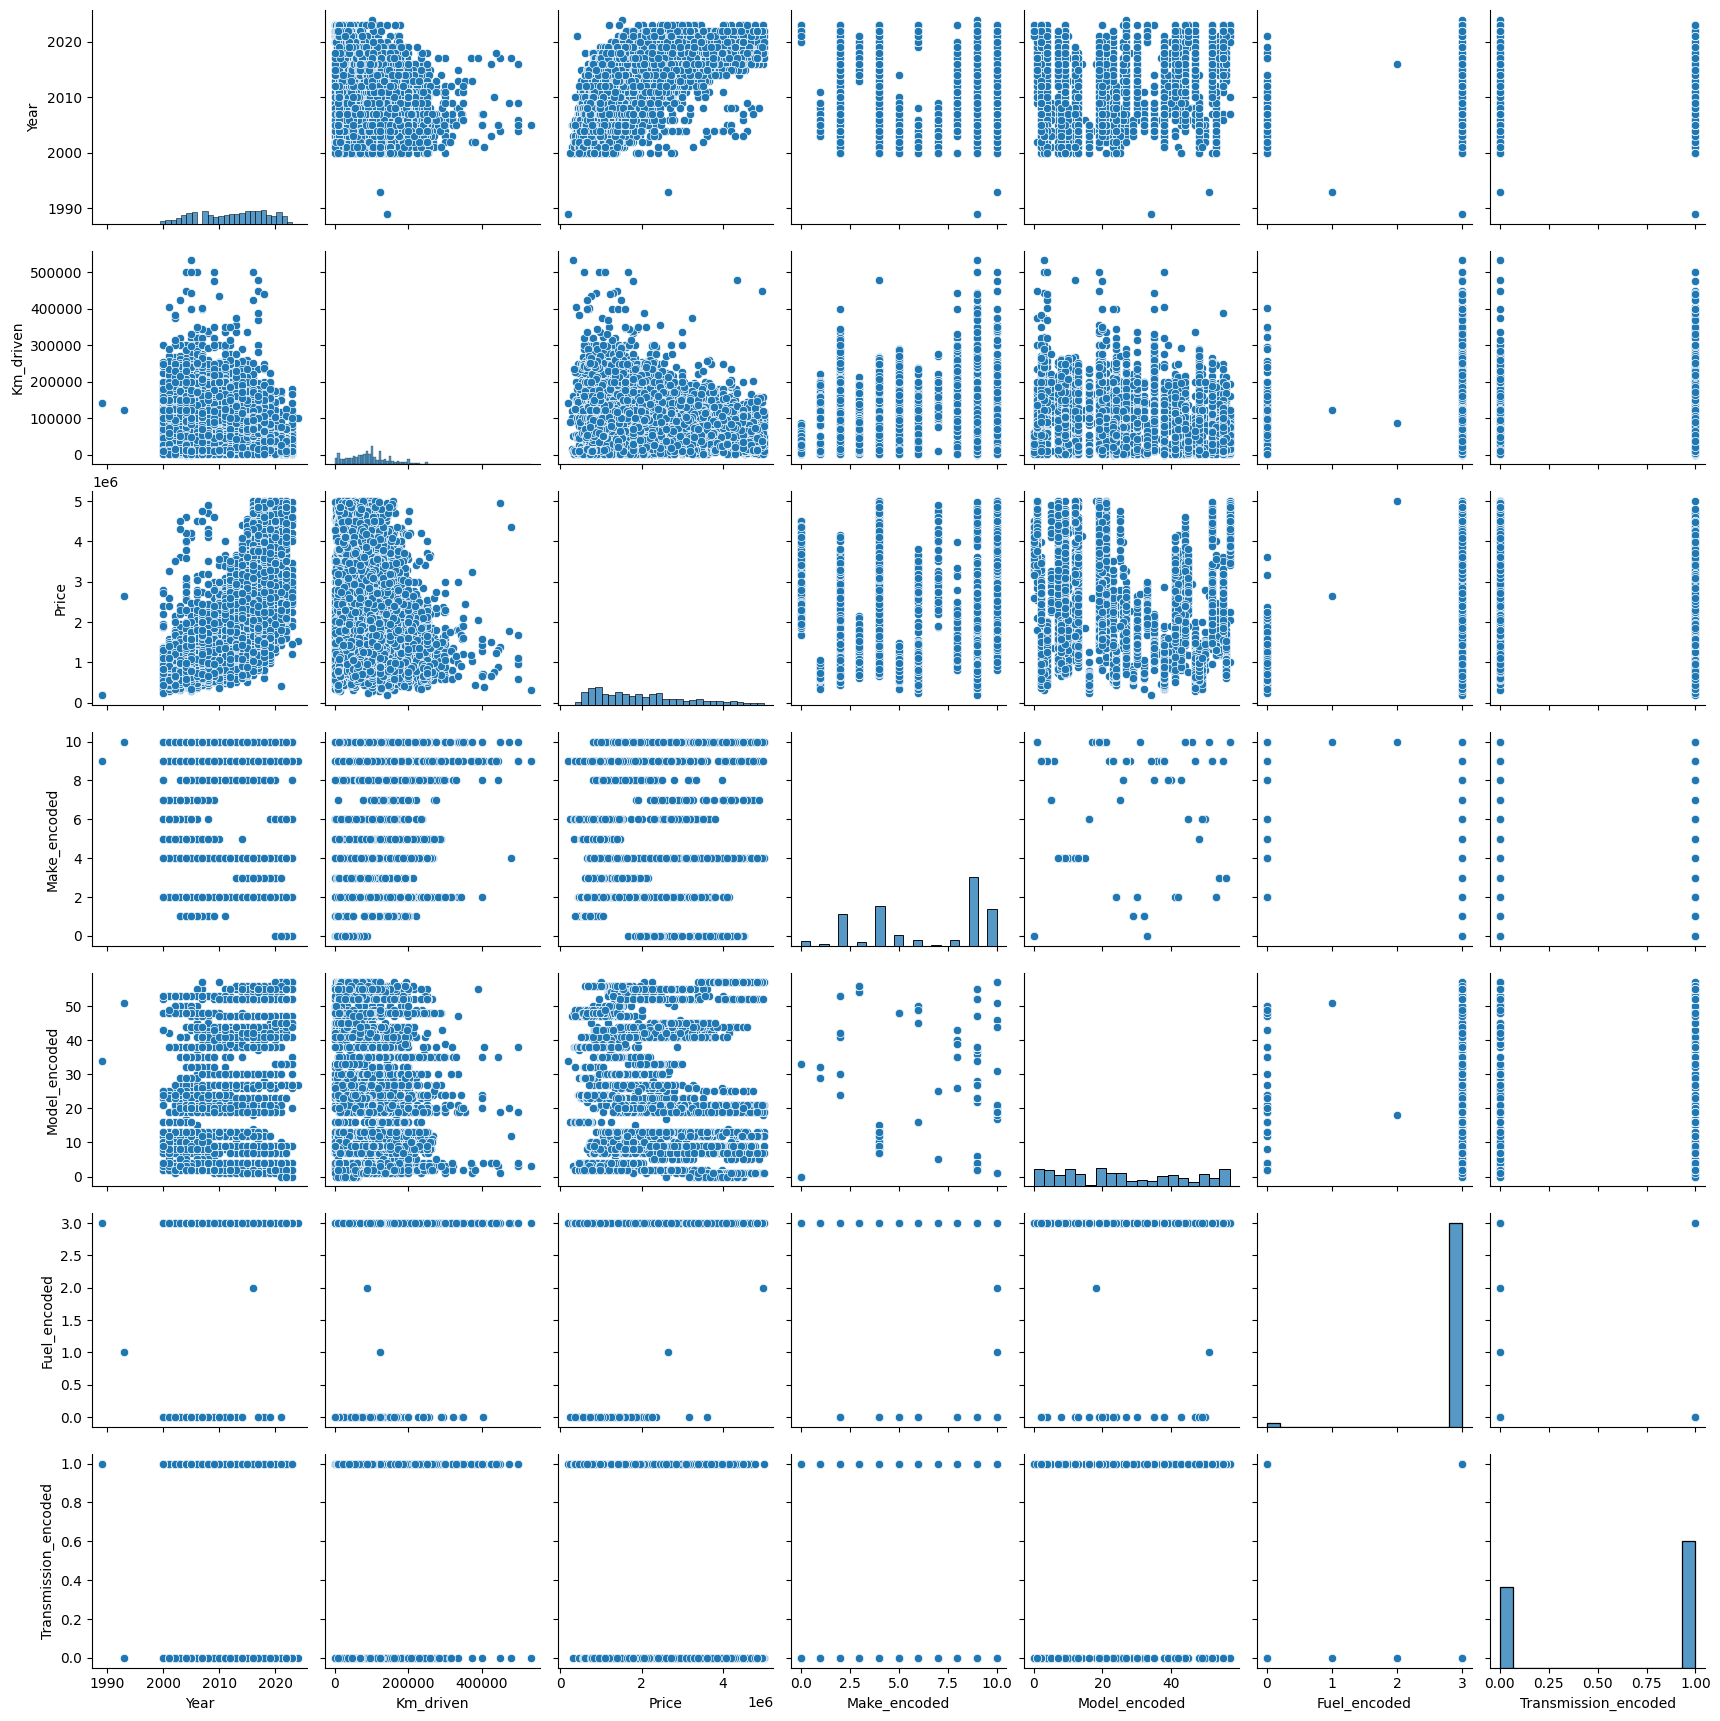

In [401]:
sns.pairplot(df_encoded)
plt.show()